**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/ooseni/Hamoye-Datasets/main/Time_series_analysis_and_forecast_DATASET.csv'

In [3]:
df = pd.read_csv(url, sep=',',dtype = float, na_values = '?',infer_datetime_format=True,
                 parse_dates={'datetime':[0]}, index_col=['datetime'])

In [4]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
datetime,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
df.shape

(92016, 4)

In [6]:
df.describe(include='all')

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
#Let's check for any irregularities not captured by the isna/isnull function
count_na = 0
for values in df.values.tolist():
    for value in values:
        if value == '?':
            count_na += 1
        else:
            continue
#Print the result
print('We have {} missing values not captured by isna/isnull command'.format(count_na))

We have 0 missing values not captured by isna/isnull command


In [9]:
df.dtypes

Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [10]:
df2 = df.copy()
df2.head()

,Tmax,SysLoad,GasPrice,ElecPrice
datetime,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [11]:
# resampling daily method
daily_df = df2.resample('D').sum()
print(daily_df.shape)
daily_df.head(10)

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
datetime,,,,
2010-09-01,379.2,41565.380,88.5600,2751.700
2010-09-02,369.6,38898.990,88.5600,570.810
2010-09-03,439.2,41665.760,106.8000,504.975
2010-09-04,328.8,35638.085,81.3600,502.275
2010-09-05,357.6,35611.410,106.8000,500.555
2010-09-06,350.4,42747.865,79.4400,667.190
2010-09-07,410.4,41837.245,84.2400,664.570
2010-09-08,446.4,37608.775,114.4776,490.390
2010-09-09,470.4,37351.660,82.5600,507.040


### **Augmented Dickey-Fuller Test (ADF Test) to check for stationarity in data**

In [12]:
from statsmodels.tsa.stattools import adfuller

**Writing a function that could check for stationarity and output the various columns that are stationary in the series.**

In [13]:
def adf_test(d_set):
  dftest = adfuller(d_set, autolag='AIC')
  adf = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lags', '# Observations'])

  for key, value in dftest[4].items():
    adf['Critical Value (%s)' %key] = value
  print(adf)

  p = adf['p-value']
  if p <= 0.05:
    print("\n Series is Stationary")
  else:
    print("\n Series is Non-Stationary")


# This function takes a time series dataframe and checks the columns that are stationary.
def get_stationarity(data):
  for i in data.columns:
    print("Column: ", i)
    print('*' * 50)
    adf_test(data[i])

**# Calling the function to test for stationarity**

In [14]:
get_stationarity(daily_df)

Column:  Tmax
**************************************************
Test Statistics          -20.766001
p-value                    0.000000
# Lags                     6.000000
# Observations          3827.000000
Critical Value (1%)       -3.432060
Critical Value (5%)       -2.862296
Critical Value (10%)      -2.567172
dtype: float64

 Series is Stationary
Column:  SysLoad
**************************************************
Test Statistics           -3.690159
p-value                    0.004254
# Lags                    30.000000
# Observations          3803.000000
Critical Value (1%)       -3.432071
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567175
dtype: float64

 Series is Stationary
Column:  GasPrice
**************************************************
Test Statistics           -2.902767
p-value                    0.045027
# Lags                    27.000000
# Observations          3806.000000
Critical Value (1%)       -3.432069
Critical Value (5%)       -2.862300
Cr

In [15]:
roll_mean = daily_df.rolling(window=365).mean()
roll_std = daily_df.rolling(window=365).std()

In [16]:
plt.rcParams['figure.figsize'] = 15,8

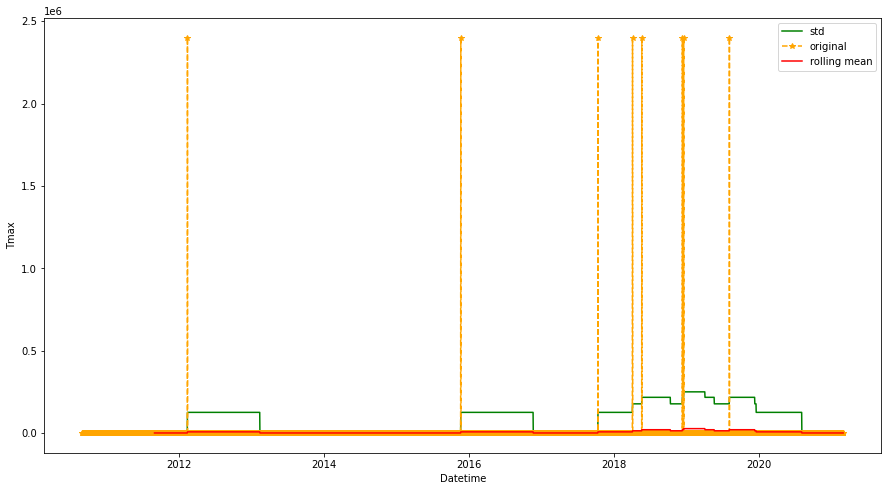

In [17]:
std = plt.plot(roll_std.index, roll_std.Tmax, color = 'green', label = 'std')
original = plt.plot(daily_df.index, daily_df.Tmax, '--', marker = '*', color = 'orange', label = 'original')
mean = plt.plot(roll_mean.index, roll_mean.Tmax, color = 'red', label = 'rolling mean')
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Tmax')
plt.show()

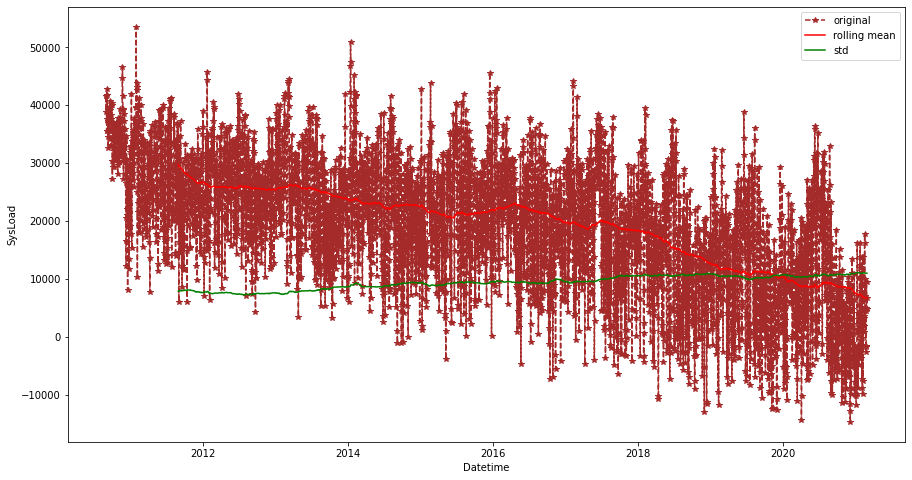

In [18]:
original = plt.plot(daily_df.index, daily_df.SysLoad,'--', marker='*', color = 'brown',label = 'original')
mean = plt.plot(roll_mean.index, roll_mean.SysLoad, color = 'red',label = 'rolling mean')
std = plt.plot(roll_std.index, roll_std.SysLoad, color = 'green', label = 'std')
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('SysLoad')
plt.show()

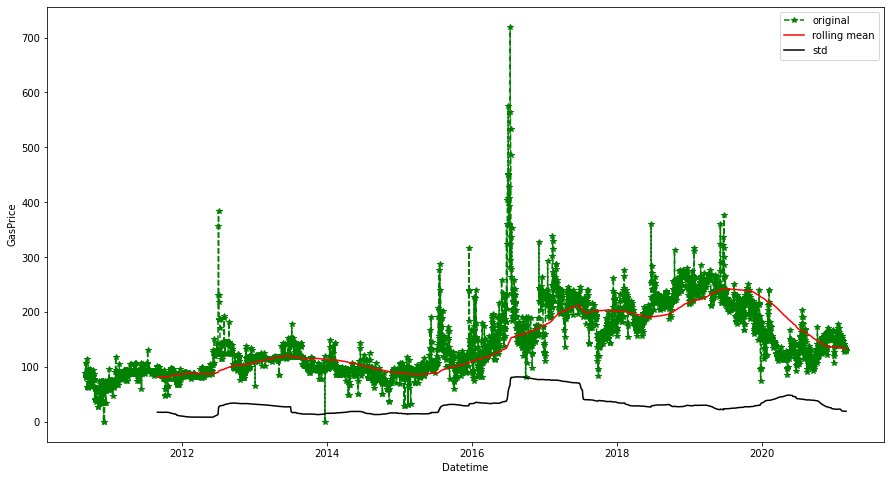

In [19]:
original = plt.plot(daily_df.index, daily_df.GasPrice,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(roll_mean.index, roll_mean.GasPrice, color = 'red',label = 'rolling mean')
std = plt.plot(roll_std.index, roll_std.GasPrice, color = 'black', label = 'std')
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('GasPrice')
plt.show()

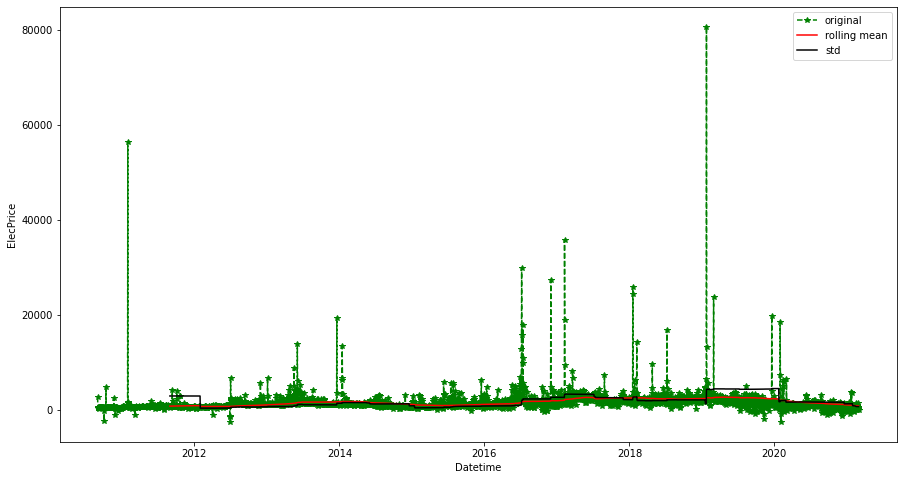

In [20]:
original = plt.plot(daily_df.index, daily_df.ElecPrice,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(roll_mean.index, roll_mean.ElecPrice, color = 'red',label = 'rolling mean')
std = plt.plot(roll_std.index, roll_std.ElecPrice, color = 'black', label = 'std')
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')
plt.show()

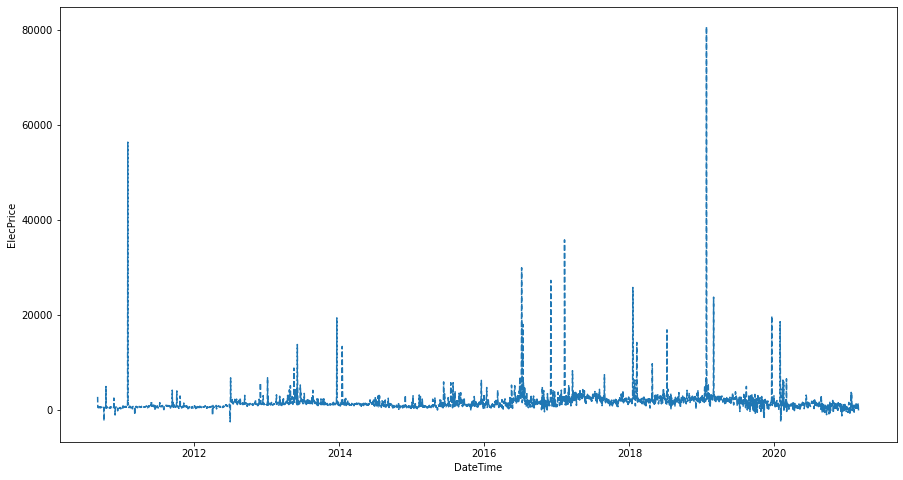

In [21]:
#ElecPrice on daily time frame
plt.plot(daily_df.index, daily_df.ElecPrice,'--')
plt.xlabel('DateTime')
plt.ylabel('ElecPrice')
plt.show()

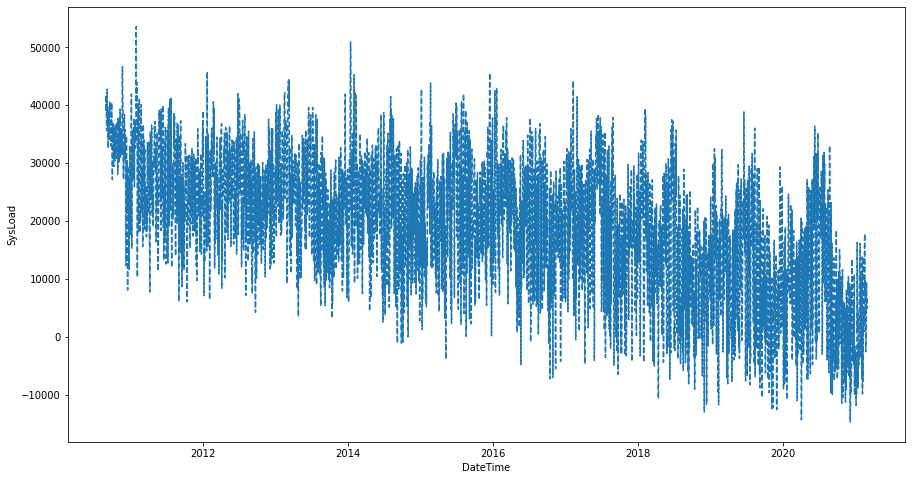

In [22]:
#SysLoad on daily time frame
plt.plot(daily_df.index, daily_df.SysLoad,'--')
plt.xlabel('DateTime')
plt.ylabel('SysLoad')
plt.show()

In [23]:
from scipy.stats import pearsonr
pearsonr(df2['ElecPrice'], df2['GasPrice'])

(0.1577677857511673, 0.0)

In [24]:
pearsonr(df2['SysLoad'], df2['Tmax'])

(-0.009795739425875118, 0.0029636417045499673)

### **Univariate Time Series Model**

In [25]:
from fbprophet import Prophet

In [26]:
daily_df.reset_index(inplace=True)
daily_prop = daily_df[['datetime', 'ElecPrice']]

In [27]:
#renaming the columns
daily_prop = daily_prop.rename(columns= {'datetime': 'ds', 'ElecPrice': 'y'})
print(daily_prop.shape)
daily_prop.head()

(3834, 2)


,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


### Splitting and fitting the model

In [28]:
# train-test split
train = daily_prop.iloc[:2757,:]
test = daily_prop.iloc[2757:,:]
print(train.shape)
print(test.shape)

(2757, 2)
(1077, 2)


In [29]:
#fitting the model
uni_model = Prophet(daily_seasonality=True)
uni_model.fit(train)
pred = uni_model.predict(test)

In [30]:
# Using functions for metrics
def MAPE_Metric(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [31]:
mape = MAPE_Metric(test['y'], pred['yhat'])
print(f'the Mean Average Percentage Error (MAPE) is: {round(mape, 2)}')

the Mean Average Percentage Error (MAPE) is: 548.23


In [32]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(pred['yhat'])))

In [33]:
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,2)))

The Root Mean Square Error(rmse) value is : 3215.27


Figure(648x864)


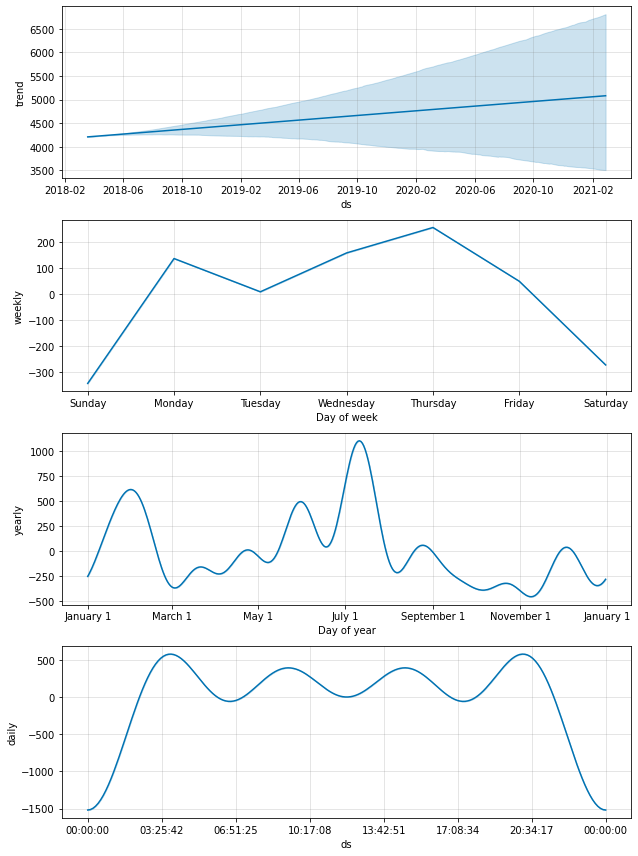

In [34]:
print(uni_model.plot_components(pred))

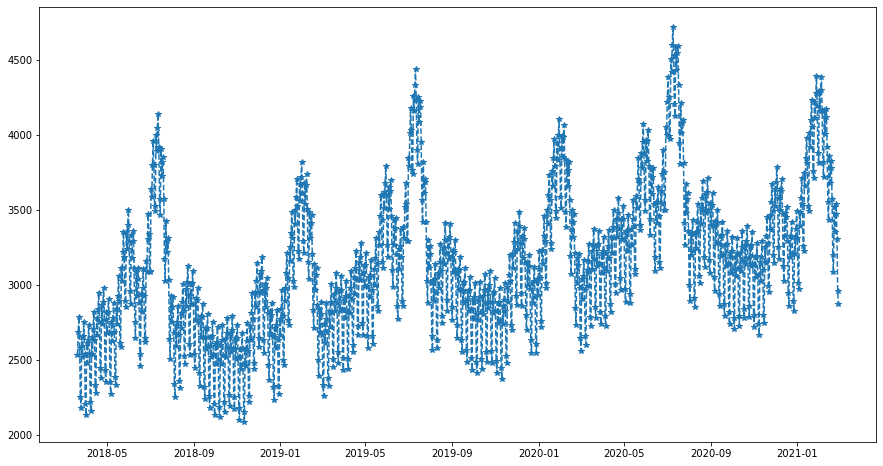

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(pred.ds, pred.yhat, '--', marker='*')

### **Multivariate Time Series Forecasting**

In [36]:
# Resetting index column of the df_daily 
daily_df.reset_index(inplace = True)
multi_p = daily_df
print(multi_p.shape)
multi_p.head()

(3834, 6)


,index,datetime,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [37]:
multi_p = multi_p.rename(columns = {'datetime':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                     'Tmax':'add2',
                                    'GasPrice':'add3'})

In [38]:
train = multi_p.iloc[:2757,:]
test = multi_p.iloc[2757:,:]
print(train.shape)
print(test.shape)

(2757, 6)
(1077, 6)


In [39]:
multi_model = Prophet(daily_seasonality=True)

In [40]:
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')

In [41]:
multi_model.fit(train)

In [42]:
m_pred = multi_model.predict(test)

In [43]:
mape = MAPE_Metric(test['y'],m_pred['yhat'])
print('The Mean Average Percentage Error (MAPE) Is : %s' %round(mape,2)) # new value

The Mean Average Percentage Error (MAPE) Is : 231.89


In [44]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(m_pred['yhat'])))
print('The Root Mean Square Error (RMSE) value Is : {}'.format(round(rmse,2)))

The Root Mean Square Error (RMSE) value Is : 2707.6


Figure(648x1080)


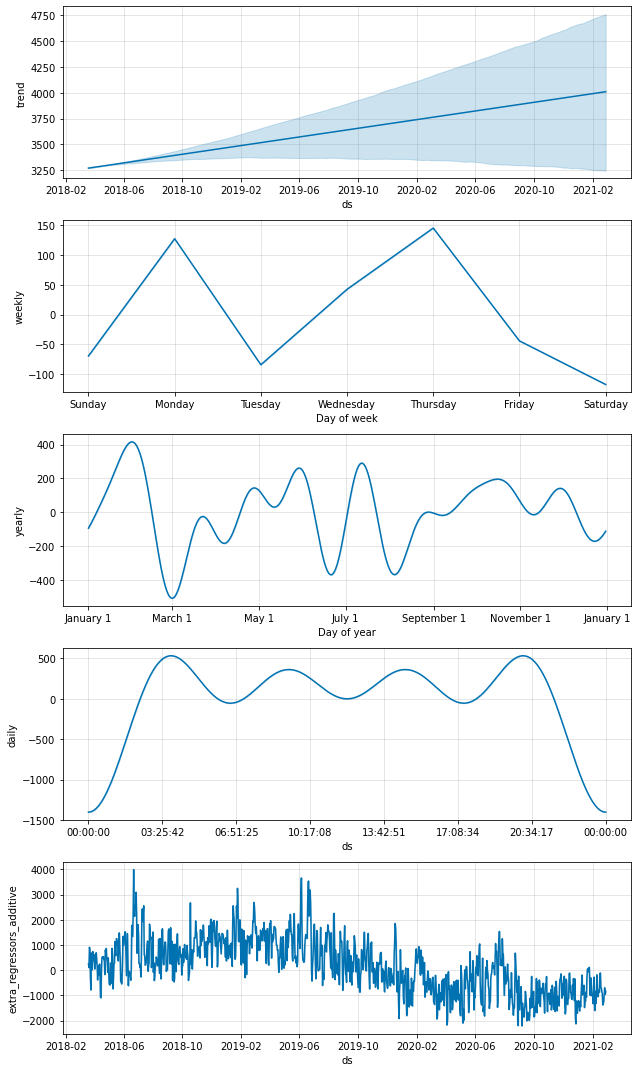

In [45]:
print(multi_model.plot_components(m_pred))

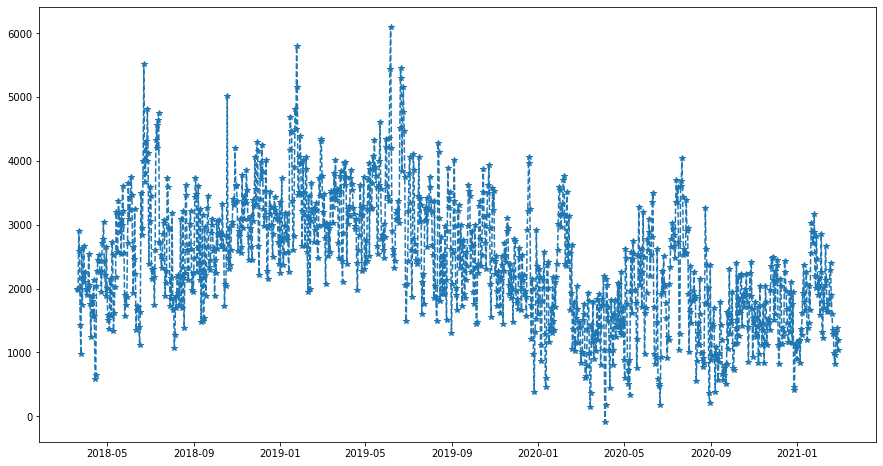

In [46]:
plt.figure(figsize=(15, 8))
plt.plot(m_pred.ds, m_pred.yhat, '--', marker='*')

⚓: **Thank You**